In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

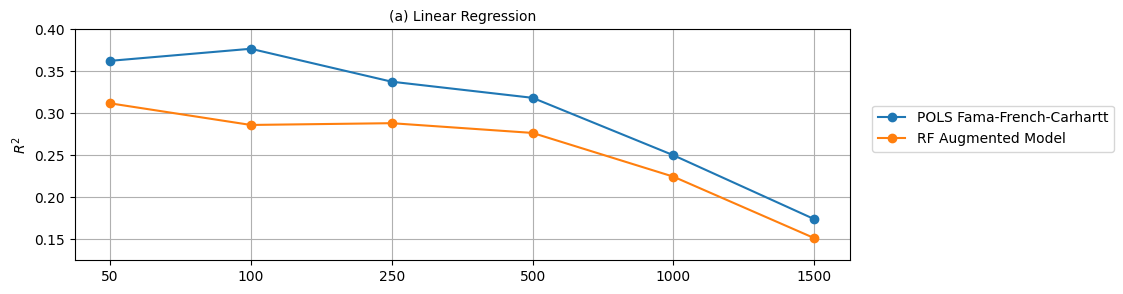

In [25]:
df = pd.DataFrame([[0.3624, 0.3768, 0.3376, 0.3184, 0.2500, 0.1739],
    [0.3119, 0.2861, 0.2882, 0.2766, 0.2245, 0.1513]])
index = ['POLS Fama-French-Carhartt', 'RF Augmented Model']
df.columns = ['50','100','250','500','1000', '1500']
df.index = index

plt.figure(figsize=(10, 3))

for index in index:
    plt.plot(['50', '100', '250', '500', '1000','1500'], df.loc[index], label=index, marker='o')
plt.title('(a) Linear Regression', size = 10)
plt.ylabel('$R^2$')
plt.grid(True)
plt.ylim(0.125, 0.4)  # Set the y-axis limits according to your data range
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.7))

In [7]:
linear_index = ['POLS', 'Lasso', 'Ridge', 'Elastic Net']
r2_linear  =pd.DataFrame([
    [-0.2316, 0.0057, 0.0576, 0.0344, 0.0422, 0.0422, 0.0649],
    [0.2182, 0.3159, 0.1660, 0.2169, 0.1744, 0.1279, 0.0697],
    [0.1368, 0.0778, 0.1506, 0.1732, 0.1589, 0.0158, -0.0277],
    [0.2310, 0.2712, 0.1012, 0.2163, 0.1707, 0.1247, 0.0702]
    ])
r2_linear.columns = ['50','100','250','500','1000', '1500','2000']
r2_linear.index = linear_index

rf_index = ['RF10', 'RF25', 'RF50', 'RF100', 'RF150', 'RF200']
r2_rf = pd.DataFrame([
    [0.2374, 0.2287, 0.2125, 0.2145, 0.1373, 0.0644, 0.0862],
    [0.2863, 0.2676, 0.2653, 0.2538, 0.1890, 0.1182, 0.1367],
    [0.3014, 0.2826, 0.2776, 0.2647, 0.2105, 0.1337, 0.1539],
    [0.3108, 0.2840, 0.2838, 0.2731, 0.2101, 0.1446, 0.1670],
    [0.3125, 0.2813, 0.2867, 0.2744, 0.2226, 0.1482, 0.1693],
    [0.3119, 0.2861, 0.2882, 0.2766, 0.2245, 0.1513, 0.1729]
    ])
r2_rf.columns = ['50','100','250','500','1000','1500','2000']
r2_rf.index = rf_index

nn_index = ['NN1', 'NN2', 'NN3', 'NN4', 'NN5', 'NN6']
r2_nn = pd.DataFrame([
    [0.2269, 0.2481, 0.2252, 0.1931, 0.1962, 0.0946, 0.1032],
    [0.2111, 0.2690, 0.1903, 0.1727, 0.1832, 0.1072, 0.1665],
    [0.2381, 0.2140, 0.2334, 0.2033, 0.1497, 0.1335, 0.1527],
    [0.2351, 0.2908, 0.2596, 0.1972, 0.1894, 0.1026, 0.1438],
    [0.1691, 0.2162, 0.1992, 0.2186, 0.1635, 0.1263, 0.1592],
    [0.1030, 0.2259, 0.1770, 0.2251, 0.0811, 0.0635, 0.1568]
    ])
r2_nn.columns = ['50','100','250','500','1000','1500','2000']
r2_nn.index = nn_index


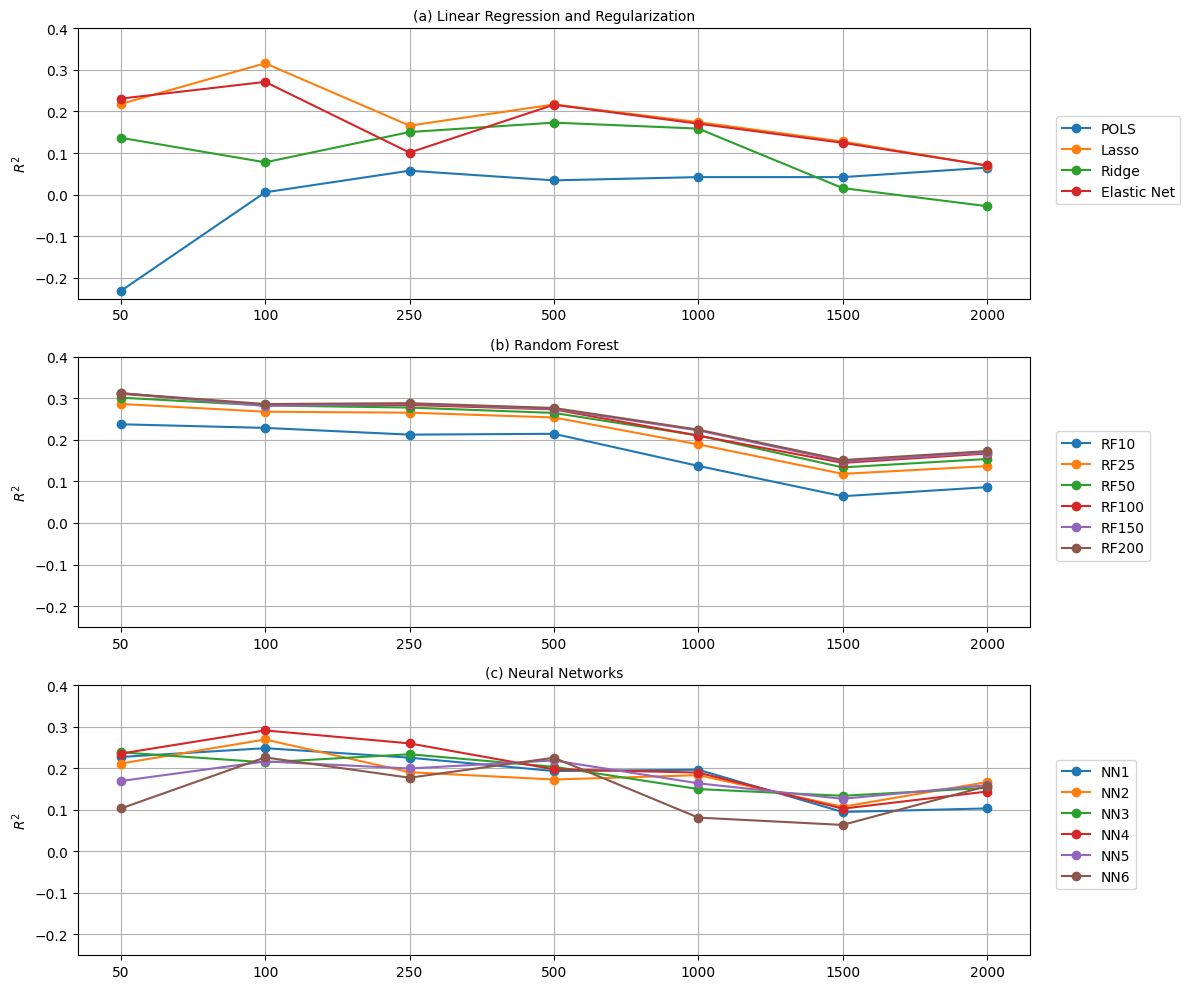

In [9]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
for index in linear_index:
    plt.plot(['50', '100', '250', '500', '1000','1500','2000'], r2_linear.loc[index], label=index, marker='o')
plt.title('(a) Linear Regression and Regularization', size = 10)
plt.ylabel('$R^2$')
plt.grid(True)
plt.ylim(-0.25, 0.4)  # Set the y-axis limits according to your data range
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.7))

# Plot for R-squared values
plt.subplot(3, 1, 2)
for index in rf_index:
    plt.plot(['50', '100', '250', '500', '1000','1500','2000'], r2_rf.loc[index], label=index, marker='o')
plt.title('(b) Random Forest', size = 10)
plt.ylabel('$R^2$')
plt.grid(True)
plt.ylim(-0.25, 0.4)  # Set the y-axis limits according to your data range
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.75))

# Plot for R-squared values
plt.subplot(3, 1, 3)
for index in nn_index:
    plt.plot(['50', '100', '250', '500', '1000','1500','2000'], r2_nn.loc[index], label=index, marker='o')
plt.title('(c) Neural Networks', size = 10)
plt.ylabel('$R^2$')
plt.grid(True)
plt.ylim(-0.25, 0.40)  # Set the y-axis limits according to your data range
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.75))
plt.tight_layout()
plt.savefig('plots/r2total.png')
plt.show()


### Hyperparameters

In [10]:
# Hyperparameter plot
x_values = ['50', '100', '250', '500', '1000', '1500','2000']
lasso_lambdas = [0.0001519911, 0.000532452, 0.001534532, 0.00030539, 0.00033539, 0.000038509,0.000044306]
ridge_lambdas = [174.7528400008, 101.5646332755, 221.453563, 454.534523452, 776.52354, 784.543252354,600.1359072734]
en_lambdas = [0.0003511192, 0.000345324, 0.001324532542, 0.00060029, 0.00061359, 0.00071359, 0.000089022]

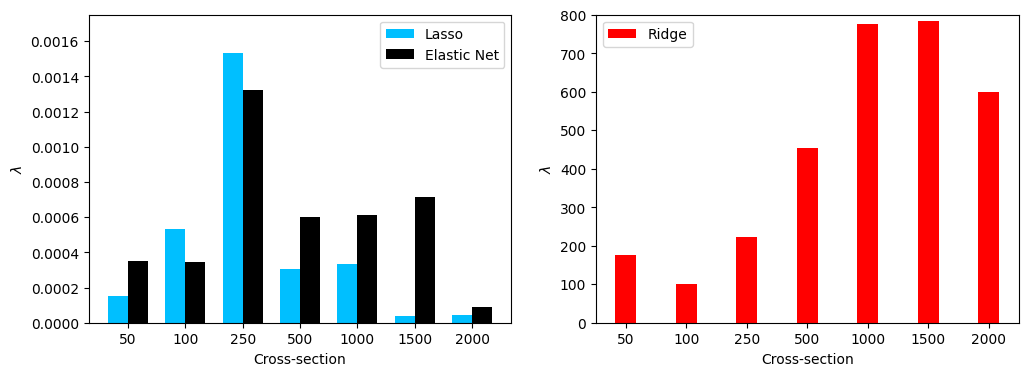

In [11]:
x_pos = np.arange(len(x_values))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1 - Lasso and Elastic Net
bar_width = 0.35
ax1.bar(x_pos - bar_width/2, lasso_lambdas, width=bar_width, color='deepskyblue', align='center', label='Lasso')
ax1.bar(x_pos + bar_width/2, en_lambdas, width=bar_width, color='black', align='center', label='Elastic Net')
ax1.set_xlabel('Cross-section')
ax1.set_ylabel('$\lambda$')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x_values)
ax1.set_ylim(0, 0.00175)
ax1.legend()

# Plot 2 - Ridge
ax2.bar(x_pos, ridge_lambdas, width=bar_width, color='red', align='center', label='Ridge')
ax2.set_ylabel('$\lambda$')
ax2.set_xticks(x_pos)
ax2.set_xlabel('Cross-section')
ax2.set_xticklabels(x_values)
ax2.set_ylim(0, 800)
ax2.legend()

# Save and show plot
os.makedirs("plots", exist_ok=True)
plt.savefig('plots/hyperparameters.jpg')
plt.show()

### Benchmark Models

In [39]:
models = ['POLS', 'Lasso', 'Ridge', 'EN', 'RF100', 'RF150', 'RF200', 'NN4', 'NN5', 'NN6']
capm = pd.DataFrame([
    [0.3632, 0.3617, 0.3196, 0.2925, 0.2176, 0.1474],
    [0.3540, 0.3599, 0.3209, 0.2961, 0.2208, 0.1497],
    [0.3542, 0.3598, 0.3208, 0.2961, 0.2208, 0.1497],
    [0.3539, 0.3599, 0.3209, 0.2961, 0.2208, 0.1497],
    [0.3183, 0.3031, 0.2582, 0.2237, 0.1716, 0.1191],
    [0.3193, 0.3036, 0.2577, 0.2241, 0.1719, 0.1190],
    [0.3188, 0.3040, 0.2576, 0.2241, 0.1720, 0.1191],
    [0.3250, 0.3192, 0.3021, 0.2780, 0.2035, 0.1397],
    [0.3266, 0.3246, 0.2910, 0.2605, 0.2118, 0.1395],
    [0.3265, 0.3089, 0.3050, 0.2772, 0.2129, 0.1379]
])

# UPDATE
ff3 = pd.DataFrame([
    [0.3648, 0.3768, 0.3376, 0.3184, 0.2500, 0.1739],
    [0.3522, 0.3701, 0.3337, 0.3137, 0.2443, 0.1704],
    [0.3528, 0.3701, 0.3337, 0.3136, 0.2443, 0.1704],
    [0.2461, 0.3701, 0.3337, 0.3137, 0.2443, 0.1704],
    [0.3188, 0.3237, 0.3024, 0.2893, 0.2216, 0.1503],
    [0.3190, 0.3250, 0.3021, 0.2889, 0.2219, 0.1506],
    [0.3173, 0.3252, 0.3029, 0.2889, 0.2226, 0.1507],
    [0.3233, 0.3331, 0.3131, 0.2965, 0.2066, 0.1502],
    [0.2514, 0.3257, 0.2944, 0.2852, 0.2282, 0.1395],
    [0.3100, 0.3243, 0.2919, 0.3014, 0.2297, 0.1543]
])

ff4 = pd.DataFrame([ 
    [0.3624, 0.3768, 0.3377, 0.3185, 0.2500, 0.1738],
    [0.3487, 0.3696, 0.3332, 0.3134, 0.2441, 0.1703],
    [0.3494, 0.3695, 0.3333, 0.3134, 0.2441, 0.1703],
    [0.2461, 0.3696, 0.3332, 0.3134, 0.2441, 0.1703],
    [0.3272, 0.3164, 0.3037, 0.2840, 0.2169, 0.1510],
    [0.3286, 0.3160, 0.3047, 0.2830, 0.2176, 0.1512],
    [0.3287, 0.3168, 0.3047, 0.2833, 0.2177, 0.1513],
    [0.3118, 0.3280, 0.3055, 0.2547, 0.2304, 0.1519],
    [0.2784, 0.3306, 0.2768, 0.2883, 0.2139, 0.1250],
    [0.2797, 0.3122, 0.2972, 0.2886, 0.2274, 0.1544]
])

# UPDATE
ff5 = pd.DataFrame([
    [0.3691, 0.3765, 0.3373, 0.3174, 0.2491, 0.1737],
    [0.3529, 0.3698, 0.3329, 0.3141, 0.2445, 0.1704],
    [0.3531, 0.3699, 0.3338, 0.3141, 0.2445, 0.1704],
    [0.2461, 0.3699, 0.3330, 0.3141, 0.2445, 0.1704],
    [0.3272, 0.3164, 0.3037, 0.2840, 0.2169, 0.1510],
    [0.3286, 0.3160, 0.3047, 0.2830, 0.2176, 0.1512],
    [0.3287, 0.3168, 0.3047, 0.2833, 0.2177, 0.1513],
    [0.3266, 0.3347, 0.2944, 0.2989, 0.1949, 0.1531],
    [0.2325, 0.3315, 0.2894, 0.2734, 0.2297, 0.1467],
    [0.3017, 0.3329, 0.3162, 0.2522, 0.2345, 0.1586]
])

capm.columns=[['50','100','250','500','1000','1500']]
ff3.columns=[['50','100','250','500','1000','1500']]
ff4.columns=[['50','100','250','500','1000','1500']]
ff5.columns=[['50','100','250','500','1000','1500']]
capm.index = models
ff3.index = models
ff4.index = models
ff5.index = models


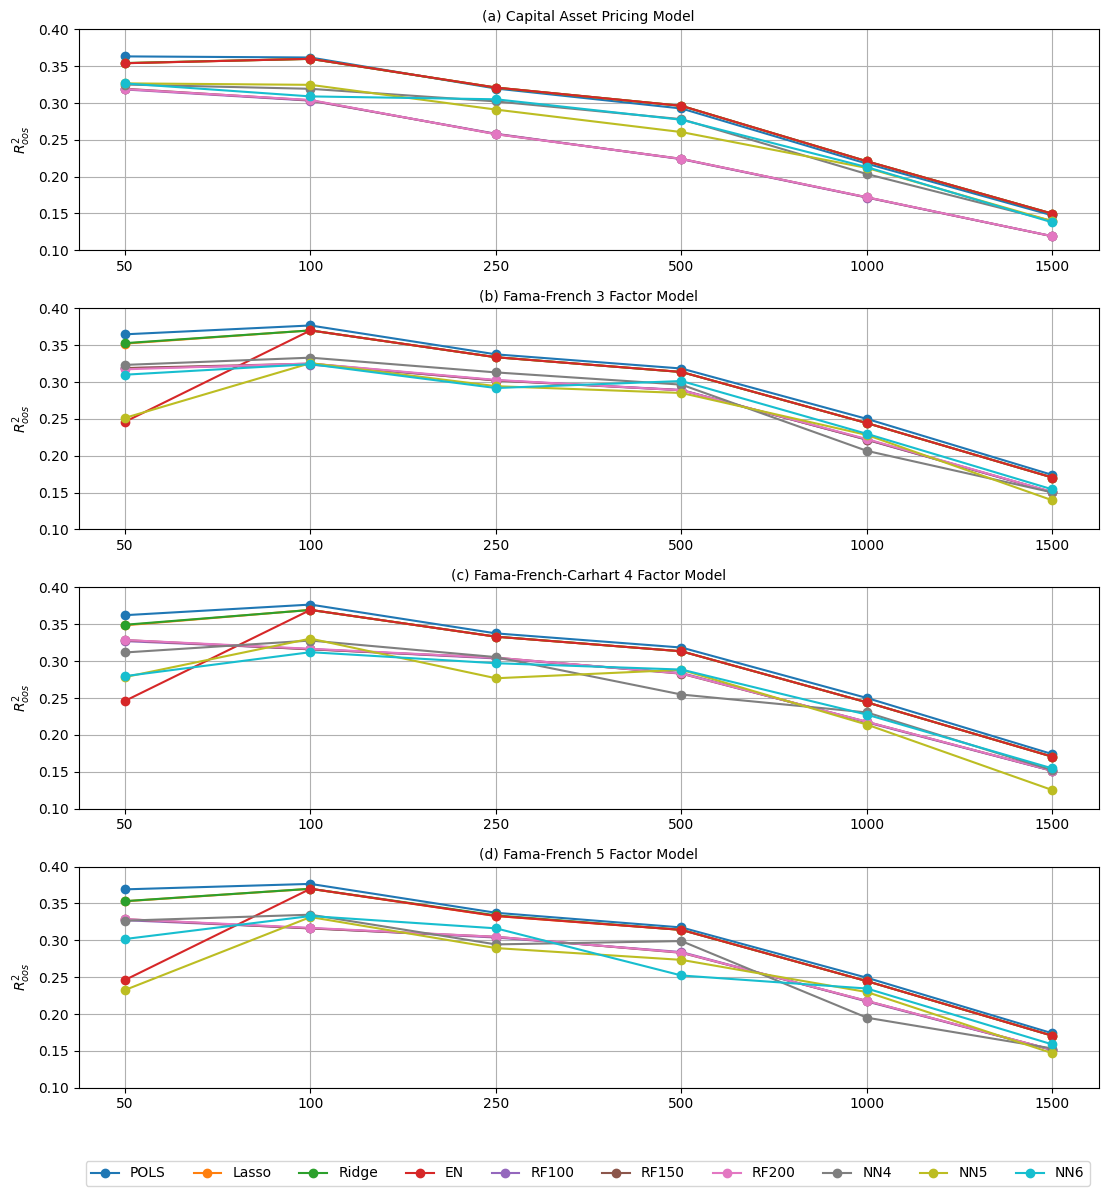

In [51]:
# Extracting values for each model
models = ['POLS', 'Lasso', 'Ridge', 'EN', 'RF100', 'RF150', 'RF200', 'NN4', 'NN5', 'NN6']
# Extracting values for each model and lagged return period
capm_values = capm.values
ff3_values = ff3.values
ff4_values = ff4.values
ff5_values = ff5.values

# Creating separate line plots for each model
plt.figure(figsize=(12, 12))

# Plot for CAPM
plt.subplot(4, 1, 1)
for model in models:
    plt.plot(['50','100','250','500','1000','1500'], capm_values[models.index(model)], label=model, marker = 'o')
plt.title('(a) Capital Asset Pricing Model', size = 10)
plt.ylabel('$R^2_{oos}$')
plt.ylim(0.1, 0.4)  # Set the y-axis limits
plt.grid(True)

# Plot for FF3
plt.subplot(4, 1, 2)
for model in models:
    plt.plot(['50','100','250','500','1000','1500'], ff3_values[models.index(model)], label=model, marker = 'o')
plt.title('(b) Fama-French 3 Factor Model', size = 10)
plt.ylabel('$R^2_{oos}$')
plt.ylim(0.1, 0.4)  # Set the y-axis limits
plt.grid(True)

# Plot for FF4
plt.subplot(4, 1, 3)
for model in models:
    plt.plot(['50','100','250','500','1000','1500'], ff4_values[models.index(model)], label=model, marker = 'o')
plt.title('(c) Fama-French-Carhart 4 Factor Model', size = 10)
plt.ylabel('$R^2_{oos}$')
plt.ylim(0.1, 0.4)  # Set the y-axis limits
plt.grid(True)

# Plot for FF5
plt.subplot(4, 1, 4)
for model in models:
    plt.plot(['50','100','250','500','1000','1500'], ff5_values[models.index(model)], label=model, marker = 'o')
plt.title('(d) Fama-French 5 Factor Model', size = 10)
plt.ylabel('$R^2_{oos}$')
plt.ylim(0.1, 0.4)  # Set the y-axis limits
plt.legend(loc='upper left', bbox_to_anchor=(0.0, -0.3), ncol=len(models), fontsize = 10)
plt.grid(True)
plt.savefig('plots/r2bm.png')
plt.tight_layout()
plt.show()
